# Predicting Algae Blooms

Adapted from: Luis Torgo, Data Mining with R, http://www.dcc.fc.up.pt/~ltorgo/DataMiningWithR

## Preconditions

(1) Install r-essentials from anaconda:

conda install -c r r-essentials

(2) Make sure the following packages are installed under $ANACONDA_PATH/lib/R/library:
- lattice
- grid
- abind
- gtools
- gdata
- gplots
- ROCR
- DMwR
- HMisc
- Formula
- acepack
- latticeExtra
- gridExtra

## Load and inspect the data

In [1]:
library("DMwR")

Loading required package: lattice
Loading required package: grid


In [2]:
data(algae)

In [3]:
algae

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
1,winter,small,medium,8,9.8,60.8,6.238,578,105,170,50,0,0,0,0,34.2,8.3,0
2,spring,small,medium,8.35,8,57.75,1.288,370,428.75,558.75,1.3,1.4,7.6,4.8,1.9,6.7,0,2.1
3,autumn,small,medium,8.1,11.4,40.02,5.33,346.66699,125.667,187.05701,15.6,3.3,53.6,1.9,0,0,0,9.7
4,spring,small,medium,8.07,4.8,77.364,2.302,98.182,61.182,138.7,1.4,3.1,41,18.9,0,1.4,0,1.4
5,autumn,small,medium,8.06,9,55.35,10.416,233.7,58.222,97.58,10.5,9.2,2.9,7.5,0,7.5,4.1,1
6,winter,small,high,8.25,13.1,65.75,9.248,430,18.25,56.667,28.4,15.1,14.6,1.4,0,22.5,12.6,2.9
7,summer,small,high,8.15,10.3,73.25,1.535,110,61.25,111.75,3.2,2.4,1.2,3.2,3.9,5.8,6.8,0
8,autumn,small,high,8.05,10.6,59.067,4.99,205.66701,44.667,77.434,6.9,18.2,1.6,0,0,5.5,8.7,0
9,winter,small,medium,8.7,3.4,21.95,0.886,102.75,36.3,71,5.544,25.4,5.4,2.5,0,0,0,0
10,winter,small,high,7.93,9.9,8,1.39,5.8,27.25,46.6,0.8,17,0,0,2.9,0,0,1.7


The observations are themselves aggregates (mean or minimum) of several samples.
For the non-chemists among us, these values represent:
- mxPH: maximum pH value
- mnO2: minimum value of O2 (oxygen)
- Cl: mean value of Cl (chloride)
- NO3: mean value of NO3 (nitrates)
- NH4: mean value of NH4 (ammonium)
- oPO4: mean value of PO4 (orthophosphate)
- PO4: mean of total PO4 (phosphate)
- Chla: mean of chlorophyll

In [4]:
# notice we are conveniently told about the number of missing values per column
summary(algae)

    season       size       speed         mxPH            mnO2       
 autumn:40   large :45   high  :84   Min.   :5.600   Min.   : 1.500  
 spring:53   medium:84   low   :33   1st Qu.:7.700   1st Qu.: 7.725  
 summer:45   small :71   medium:83   Median :8.060   Median : 9.800  
 winter:62                           Mean   :8.012   Mean   : 9.118  
                                     3rd Qu.:8.400   3rd Qu.:10.800  
                                     Max.   :9.700   Max.   :13.400  
                                     NA's   :1       NA's   :2       
       Cl               NO3              NH4                oPO4       
 Min.   :  0.222   Min.   : 0.050   Min.   :    5.00   Min.   :  1.00  
 1st Qu.: 10.981   1st Qu.: 1.296   1st Qu.:   38.33   1st Qu.: 15.70  
 Median : 32.730   Median : 2.675   Median :  103.17   Median : 40.15  
 Mean   : 43.636   Mean   : 3.282   Mean   :  501.30   Mean   : 73.59  
 3rd Qu.: 57.824   3rd Qu.: 4.446   3rd Qu.:  226.95   3rd Qu.: 99.33  
 Max.   

## Data Visualization

Let's visually inspect the data, looking especially at columns where a big difference between mean and medium suggests skewness.

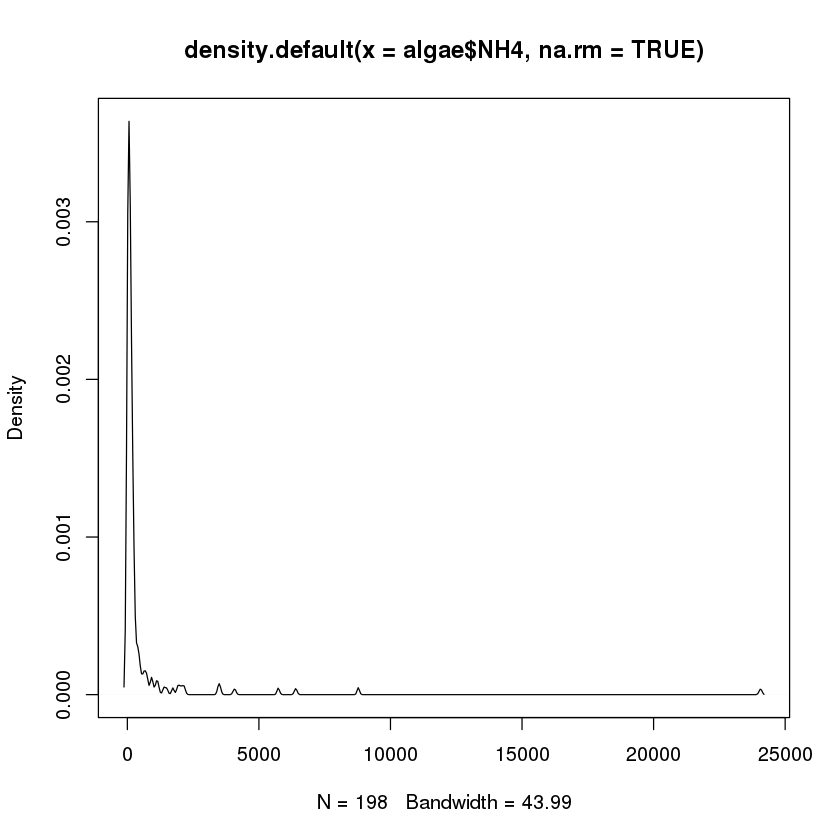

In [5]:
plot(density(algae$NH4, na.rm = TRUE))

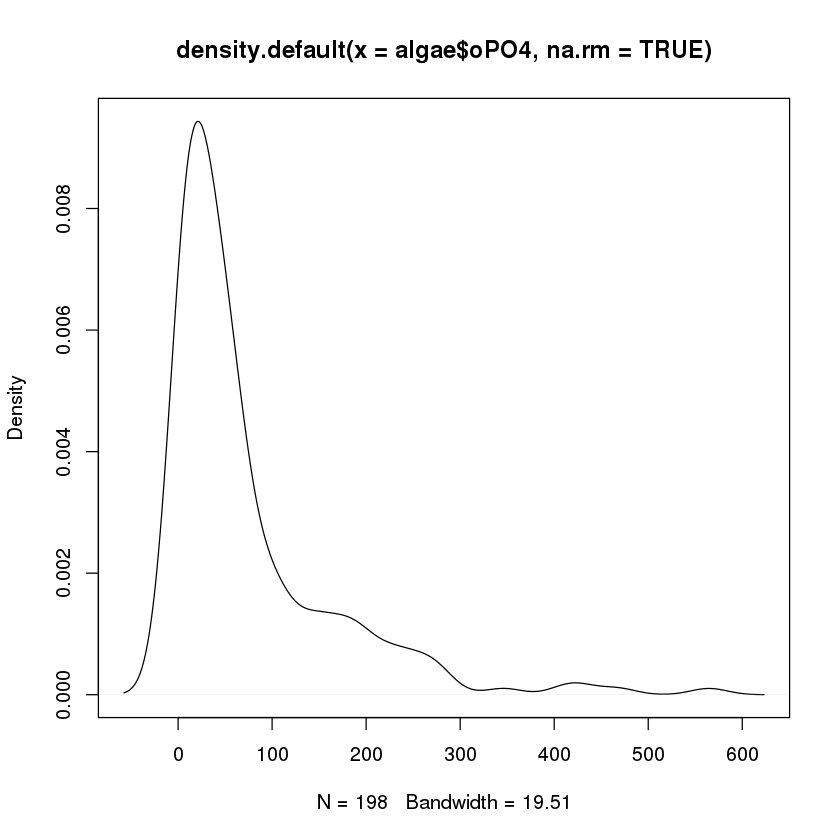

In [6]:
plot(density(algae$oPO4, na.rm = TRUE))

On the other hand, mxPH seems to nicely approximate a normal distribution, which we can verify using a qqplot:

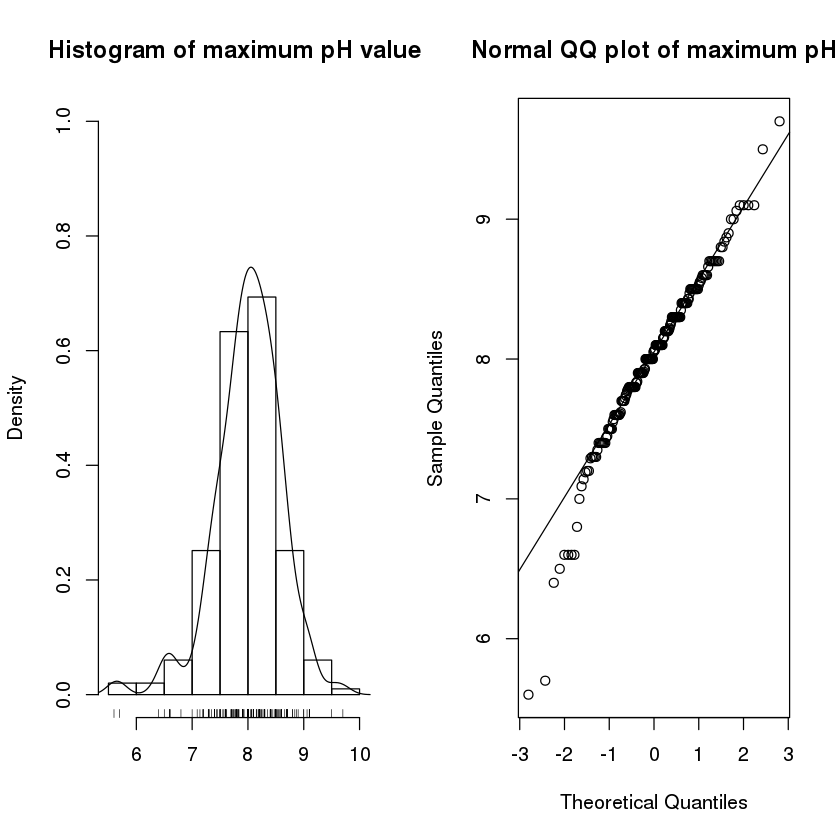

In [7]:
par(mfrow=c(1,2))
hist(algae$mxPH, prob=T, xlab='', main='Histogram of maximum pH value',ylim=0:1)
lines(density(algae$mxPH,na.rm=T))
rug(jitter(algae$mxPH))

qqnorm(algae$mxPH,main='Normal QQ plot of maximum pH')
qqline(algae$mxPH)

Compare this with the qqplot of oPO4:

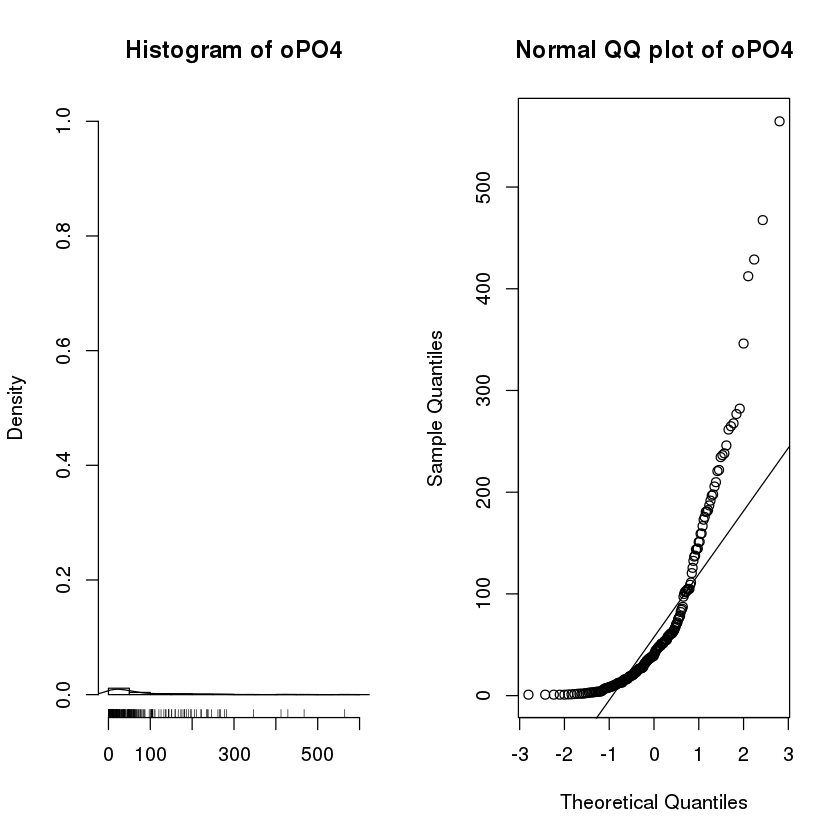

In [8]:
par(mfrow=c(1,2))
hist(algae$oPO4, prob=T, xlab='', main='Histogram of oPO4',ylim=0:1)
lines(density(algae$oPO4,na.rm=T))
rug(jitter(algae$oPO4))
qqnorm(algae$oPO4,main='Normal QQ plot of oPO4')
qqline(algae$oPO4)

The completely different distributions can also be nicely seen using boxplots:

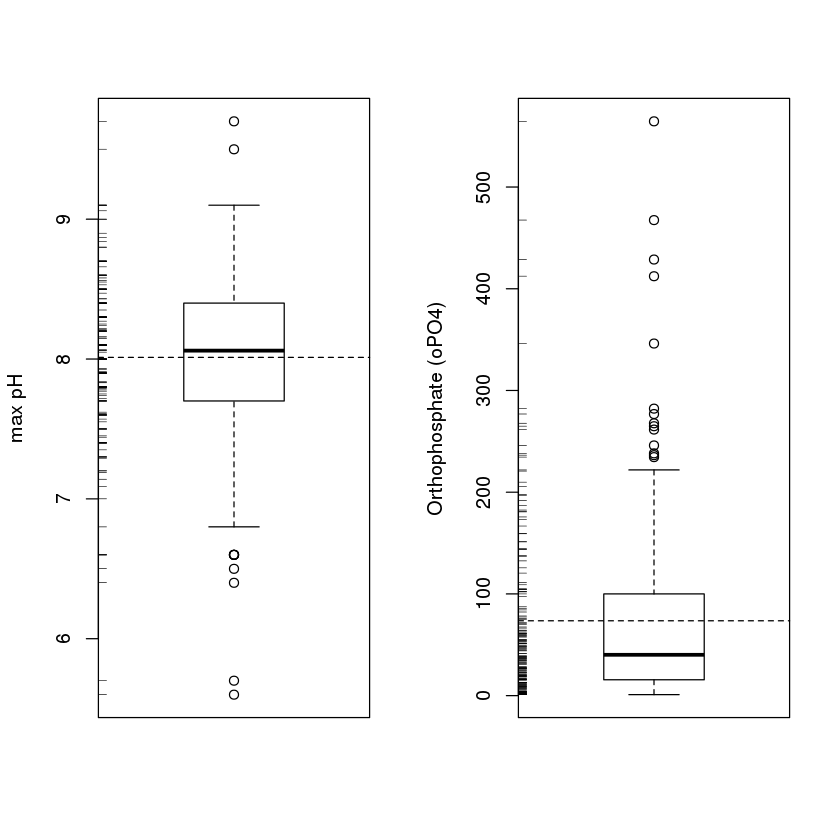

In [9]:
par(mfrow=c(1,2))
boxplot(algae$mxPH, ylab="max pH")
rug(jitter(algae$mxPH), side=2)
abline(h=mean(algae$mxPH, na.rm=T), lty=2)

boxplot(algae$oPO4,ylab='Orthophosphate (oPO4)')
rug(jitter(algae$oPO4),side=2)
abline(h=mean(algae$oPO4,na.rm=T),lty=2)

## Identifying outliers

Plot the data together with mean + 1sd to visualize outliers:

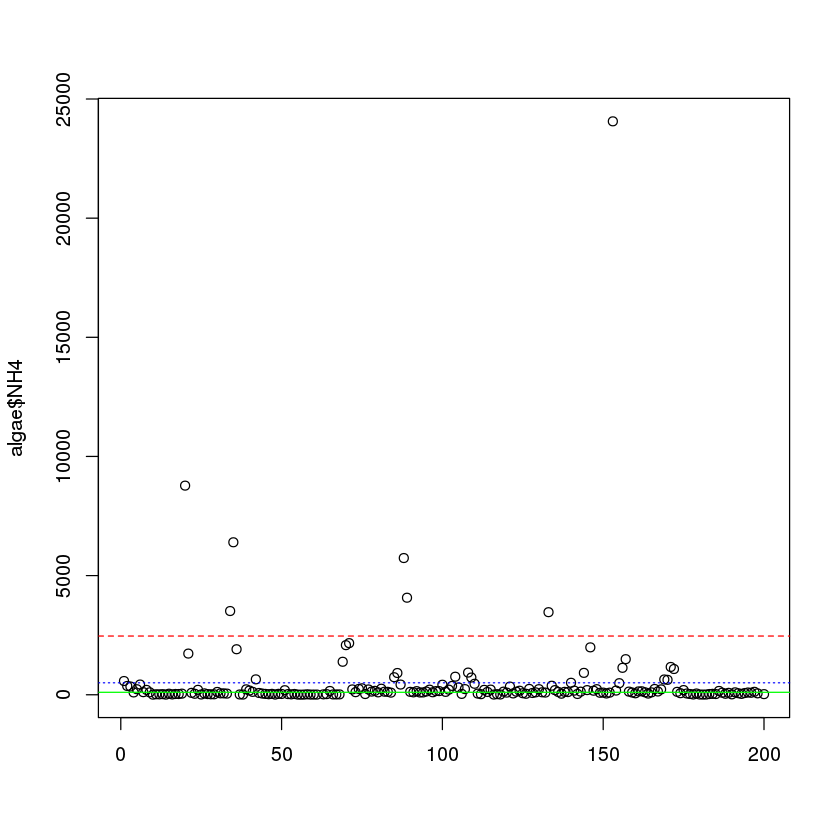

In [10]:
plot(algae$NH4,xlab='')
abline(h=mean(algae$NH4,na.rm=T),lty=3, col='blue')
abline(h=mean(algae$NH4,na.rm=T)+sd(algae$NH4,na.rm=T),lty=2, col='red')
abline(h=median(algae$NH4,na.rm=T),lty=1, col='green')

... and identify those observations in the dataframe:

In [11]:
algae[!is.na(algae$NH4) & algae$NH4 > 19000,]

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
153,autumn,medium,high,7.3,11.8,44.205,45.65,24064,44,34,53.1,2.2,0,0,1.2,5.9,77.6,0


## Inspecting predictor - target relationships

Concentration of algal a1 by river size:

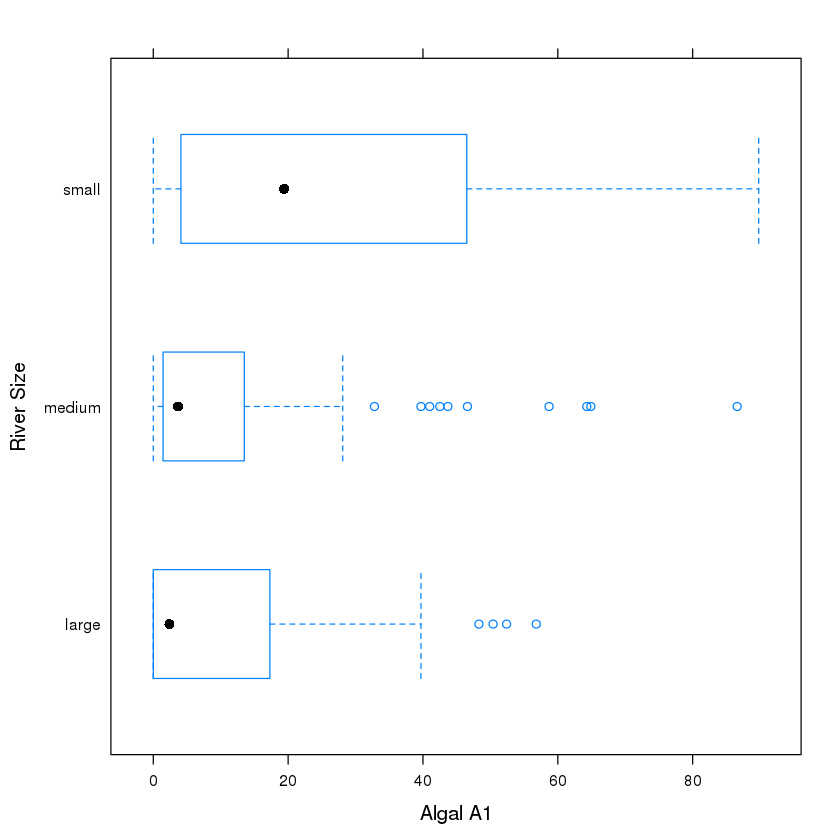

In [12]:
# box-and-whisker plot from lattice library
bwplot(size ~ a1, data=algae,ylab='River Size',xlab='Algal A1')

Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units



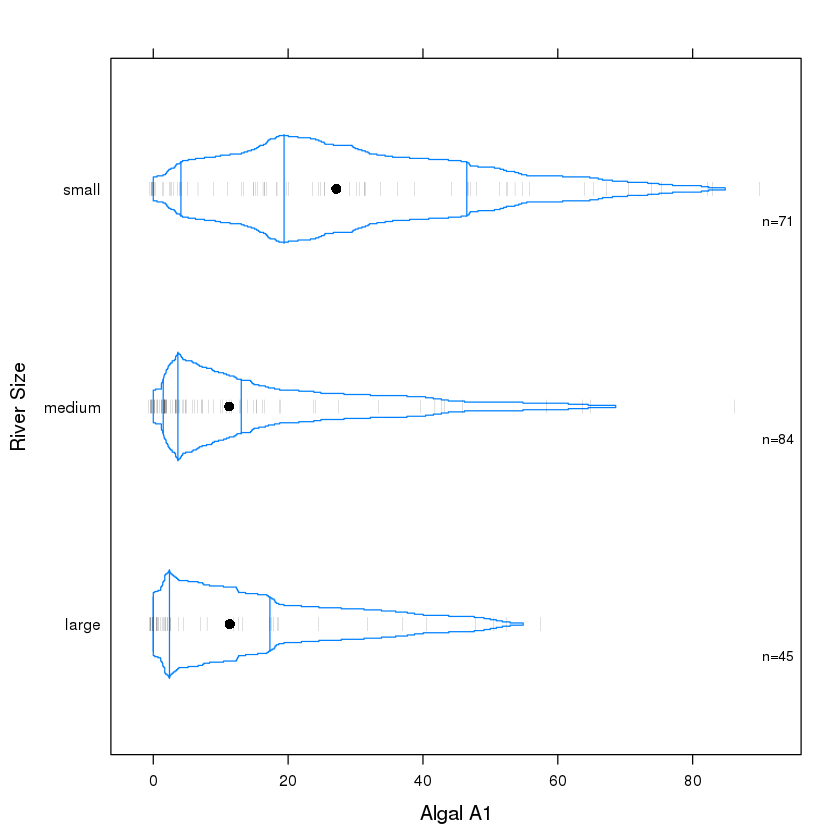

In [13]:
library(Hmisc)
bwplot(size ~ a1, data=algae,panel=panel.bpplot, probs=seq(.01,.49,by=.01), datadensity=TRUE, ylab='River Size',xlab='Algal A1')

Two predictors: condition on season and mnO2:

In [14]:
# from: lattice
minO2 <- equal.count(na.omit(algae$mnO2), number=4,overlap=1/5)
minO2


Data:
  [1]  9.80  8.00 11.40  4.80  9.00 13.10 10.30 10.60  3.40  9.90 10.20 11.70
 [13]  9.60 11.80  9.60 11.50 12.00  9.80 10.40  3.20 10.70  9.20 10.30  8.50
 [25]  9.40 10.70  8.40 11.10  9.80 11.30 12.50 10.30 11.30  9.90  7.80  8.40
 [37] 10.90  8.90 10.50  5.50  7.10  7.70  8.80 13.40 12.50 12.10 12.60  9.60
 [49] 11.21 10.20  7.90 11.00  9.00 10.80 11.80 10.80  9.50 10.80 11.30 10.40
 [61] 11.70 10.80 11.70 10.10  9.80 12.10  1.50  1.80  7.10  8.10 10.20  8.10
 [73]  6.80  9.40  9.80  5.90  3.30  9.20  9.80 11.70  8.90 11.17 10.80  6.00
 [85] 10.77  3.60  9.70  8.60  9.40 10.70  8.50 10.50 11.80 10.50  5.40  4.50
 [97]  6.30  8.20  7.10  6.50  5.30  8.80 10.00  7.40 11.10 11.10  6.00 11.10
[109]  9.80 11.30 11.80  6.00  9.70 10.80 11.62 11.60  5.30  6.60  9.40  7.10
[121]  9.00 10.70  9.70 10.70 11.60  6.90 10.00 10.10  7.70 10.50  9.80  8.30
[133] 11.90  9.20 11.70  9.90  6.20 11.20  6.20  9.50 10.50  4.50  6.30  6.50
[145]  8.10  9.90  9.00  4.90 11.00  4.40 11.80  6.00 10.

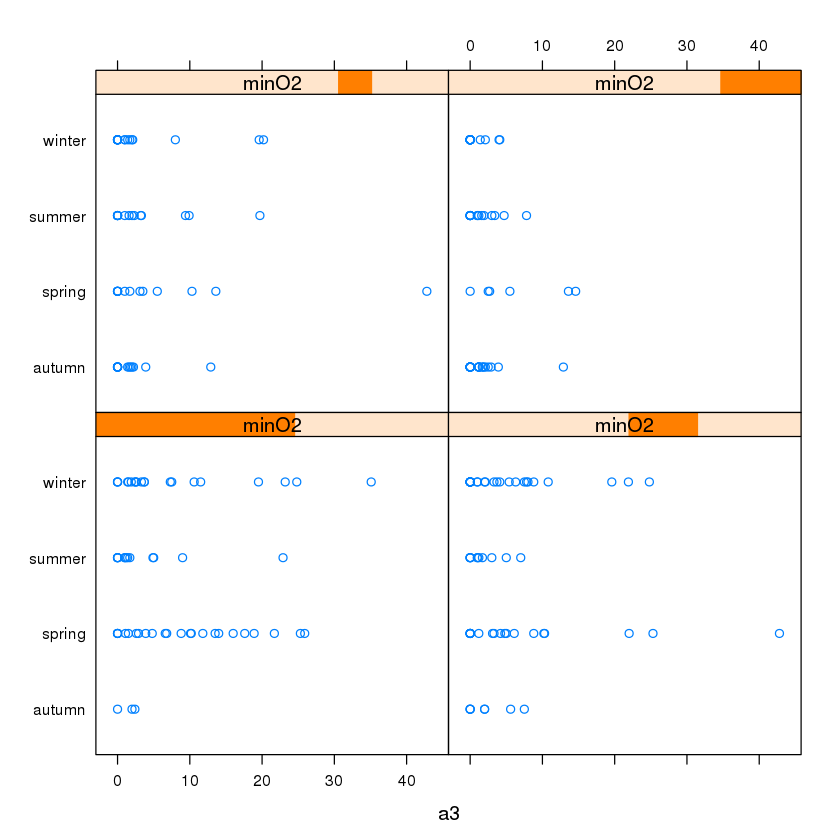

In [15]:
# order: left to right and bottom-up
stripplot(season ~ a3|minO2, data=algae[!is.na(algae$mnO2),])

## Handling missing data

In [16]:
# reload dataset
data(algae)
algae[!complete.cases(algae),]

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
28,autumn,small,high,6.8,11.1,9,0.63,20,4,NA,2.7,30.3,1.9,0,0,2.1,1.4,2.1
38,spring,small,high,8,NA,1.45,0.81,10,2.5,3,0.3,75.8,0,0,0,0,0,0
48,winter,small,low,NA,12.6,9,0.23,10,5,6,1.1,35.5,0,0,0,0,0,0
55,winter,small,high,6.6,10.8,NA,3.245,10,1,6.5,NA,24.3,0,0,0,0,0,0
56,spring,small,medium,5.6,11.8,NA,2.22,5,1,1,NA,82.7,0,0,0,0,0,0
57,autumn,small,medium,5.7,10.8,NA,2.55,10,1,4,NA,16.8,4.6,3.9,11.5,0,0,0
58,spring,small,high,6.6,9.5,NA,1.32,20,1,6,NA,46.8,0,0,28.8,0,0,0
59,summer,small,high,6.6,10.8,NA,2.64,10,2,11,NA,46.9,0,0,13.4,0,0,0
60,autumn,small,medium,6.6,11.3,NA,4.17,10,1,6,NA,47.1,0,0,0,0,1.2,0
61,spring,small,medium,6.5,10.4,NA,5.97,10,2,14,NA,66.9,0,0,0,0,0,0


In [17]:
nrow(algae[!complete.cases(algae),])

[1] 16

### Way 1: Remove all rows with missing data

In [18]:
algae <- na.omit(algae)
nrow(algae)

[1] 184

### Way 2: Handle rows individually

#### Step 1: First remove all rows with higher than x percentage of NAs

In [19]:
# reload dataset
data(algae)
apply(algae,1,function(x) sum(is.na(x)))

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 [38] 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 2 2 2 2 2 2 6 1 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0

In [20]:
# from: DMwR
# return rows with more than <parameter 2> proportion of NAs
manyNAs(algae,0.2)

[1]  62 199

In [21]:
algae <- algae[-c(62,199),]
nrow(algae)

[1] 198

In [22]:
# reload dataset
data(algae)
# 1-step alternative to the above
algae <- algae[-manyNAs(algae),]
nrow(algae)

[1] 198

#### Step 2: Fill missing rows with central statistic (mean, median, mode)

In [23]:
# Using the mean for approximately normally distributed mxPH
algae[48,'mxPH'] <- mean(algae$mxPH,na.rm=T)
algae[48,]

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
48,winter,small,low,8.01997461928934,12.6,9,0.23,10,5,6,1.1,35.5,0,0,0,0,0,0


In [24]:
algae[is.na(algae$Chla),]

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
55,winter,small,high,6.6,10.8,NA,3.245,10,1,6.5,NA,24.3,0,0,0,0,0,0
56,spring,small,medium,5.6,11.8,NA,2.22,5,1,1,NA,82.7,0,0,0,0,0,0
57,autumn,small,medium,5.7,10.8,NA,2.55,10,1,4,NA,16.8,4.6,3.9,11.5,0,0,0
58,spring,small,high,6.6,9.5,NA,1.32,20,1,6,NA,46.8,0,0,28.8,0,0,0
59,summer,small,high,6.6,10.8,NA,2.64,10,2,11,NA,46.9,0,0,13.4,0,0,0
60,autumn,small,medium,6.6,11.3,NA,4.17,10,1,6,NA,47.1,0,0,0,0,1.2,0
61,spring,small,medium,6.5,10.4,NA,5.97,10,2,14,NA,66.9,0,0,0,0,0,0
63,autumn,small,high,7.83,11.7,4.083,1.328,18,3.333,6.667,NA,14.4,0,0,0,0,0,0
116,winter,medium,high,9.7,10.8,0.222,0.406,10,22.444,10.111,NA,41,1.5,0,0,0,0,0
184,winter,large,high,8,10.9,9.055,0.825,40,21.083,56.091,NA,16.8,19.6,4,0,0,0,0


In [25]:
# using the median for strongly skew Chla
algae[is.na(algae$Chla),'Chla'] <- median(algae$Chla,na.rm=T)
algae[55:61,'Chla']

[1] 5.475 5.475 5.475 5.475 5.475 5.475 5.475

In [26]:
#reload dataset
data(algae)
algae <- algae[-manyNAs(algae),]
# convenience function from DMwR
algae <- centralImputation(algae)
algae[!complete.cases(algae),]

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7


#### Step 2 - alternative: Use correlations between features to impute values

In [27]:
cor(algae[,4:18],use="complete.obs")

,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
mxPH,1.00000000,-0.16749178,0.13285681,-0.13103951,-0.09360612,0.15850785,0.18033494,0.39121495,-0.26823725,0.32584814,0.03077250,-0.24876290,-0.01697947,-0.08388657,-0.08726106
mnO2,-0.16749178,1.00000000,-0.27873229,0.09837676,-0.08780541,-0.41655069,-0.48772564,-0.16678069,0.28389830,-0.09935631,-0.25155437,-0.31513753,0.17008979,0.15864906,-0.12117098
Cl,0.13285681,-0.27873229,1.00000000,0.22504071,0.07407466,0.39230733,0.45652107,0.15082753,-0.36078101,0.08949837,0.09429722,0.12045912,0.16514900,0.18369968,-0.02793640
NO3,-0.13103951,0.09837676,0.22504071,1.00000000,0.72144352,0.14458782,0.16931401,0.14290962,-0.24121109,0.02368832,-0.07621407,-0.02578257,0.22359794,0.54640569,0.08509789
NH4,-0.09360612,-0.08780541,0.07407466,0.72144352,1.00000000,0.22723723,0.20844445,0.09375115,-0.13265601,-0.02968344,-0.10143974,0.22822914,0.02745909,0.40571045,-0.01672691
oPO4,0.15850785,-0.41655069,0.39230733,0.14458782,0.22723723,1.00000000,0.91387767,0.12941615,-0.41735761,0.14768993,0.03362906,0.29574585,0.15147500,0.02876159,0.04849832
PO4,0.18033494,-0.48772564,0.45652107,0.16931401,0.20844445,0.91387767,1.00000000,0.26758873,-0.48730097,0.16246963,0.06587312,0.30462623,0.19111521,0.08316987,0.10671057
Chla,0.39121495,-0.16678069,0.15082753,0.14290962,0.09375115,0.12941615,0.26758873,1.00000000,-0.28380049,0.38192280,-0.04975884,-0.08364618,-0.05945318,0.01815732,0.02405581
a1,-0.26823725,0.28389830,-0.36078101,-0.24121109,-0.13265601,-0.41735761,-0.48730097,-0.28380049,1.00000000,-0.29251967,-0.14695028,-0.03892441,-0.29503346,-0.27602608,-0.21142489
a2,0.32584814,-0.09935631,0.08949837,0.02368832,-0.02968344,0.14768993,0.16246963,0.38192280,-0.29251967,1.00000000,0.03031095,-0.17168171,-0.16186215,-0.11613061,0.04749242


In [28]:
symnum(cor(algae[,4:18],use="complete.obs"))

     mP mO Cl NO NH o P Ch a1 a2 a3 a4 a5 a6 a7
mxPH 1                                         
mnO2    1                                      
Cl         1                                   
NO3           1                                
NH4           ,  1                             
oPO4    .  .        1                          
PO4     .  .        * 1                        
Chla .                  1                      
a1         .        . .    1                   
a2   .                  .     1                
a3                               1             
a4      .             .             1          
a5                                     1       
a6            .  .                     .  1    
a7                                           1 
attr(,"legend")
[1] 0 ‘ ’ 0.3 ‘.’ 0.6 ‘,’ 0.8 ‘+’ 0.9 ‘*’ 0.95 ‘B’ 1

Because of the high correlation between oPO4 and PO4, we will fill in oPO4 from PO4:

In [29]:
# reload dataset
data(algae)
algae <- algae[-manyNAs(algae),]
lm(PO4 ~ oPO4,data=algae)


Call:
lm(formula = PO4 ~ oPO4, data = algae)

Coefficients:
(Intercept)         oPO4  
     42.897        1.293  


In [30]:
algae[28,'PO4'] <- 42.897 + 1.293 * algae[28,'oPO4']

In [31]:
# do this for the whole dataframe
data(algae)
algae <- algae[-manyNAs(algae),]
fillPO4 <- function(oP) {
   if (is.na(oP)) return(NA)
   else return(42.897 + 1.293 * oP)
}
algae[is.na(algae$PO4),'PO4'] <- 
    sapply(algae[is.na(algae$PO4),'oPO4'],fillPO4)

#### Step 2 - another alternative: use similar rows to impute values

In [32]:
# reload dataset
data(algae)
algae <- algae[-manyNAs(algae),]
# uses weighted Euclidean distance
algae <- knnImputation(algae,k=10)

In [33]:
# reload dataset
data(algae)
algae <- algae[-manyNAs(algae),]
algae <- knnImputation(algae,k=10,meth='median')

## Linear Regression

In [34]:
# start afresh
data(algae)
algae <- algae[-manyNAs(algae), ]
clean.algae <- knnImputation(algae, k = 10)

### Use all predictors

In [35]:
# Notice factors get binarized automatically
lm.a1 <- lm(a1 ~ .,data=clean.algae[,1:12])
lm.a1


Call:
lm(formula = a1 ~ ., data = clean.algae[, 1:12])

Coefficients:
 (Intercept)  seasonspring  seasonsummer  seasonwinter    sizemedium  
   42.942055      3.726978      0.747597      3.692955      3.263728  
   sizesmall      speedlow   speedmedium          mxPH          mnO2  
    9.682140      3.922084      0.246764     -3.589118      1.052636  
          Cl           NO3           NH4          oPO4           PO4  
   -0.040172     -1.511235      0.001634     -0.005435     -0.052241  
        Chla  
   -0.088022  


The significance check in the last column tests against the null hypothesis that the coefficient is zero, where t is calculated as the ratio between coefficient value and standard error. The test then gives the probability of seeing a t value as great as or greater than this given the assumption the coefficient is zero.

The F test checks the null hypothesis that none of the coefficients is significantly different from 0.

Finally and most importantly, R square (and adjusted R square) is the proportion of variance explained.

In [36]:
summary(lm.a1)


Call:
lm(formula = a1 ~ ., data = clean.algae[, 1:12])

Residuals:
    Min      1Q  Median      3Q     Max 
-37.679 -11.893  -2.567   7.410  62.190 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  42.942055  24.010879   1.788  0.07537 . 
seasonspring  3.726978   4.137741   0.901  0.36892   
seasonsummer  0.747597   4.020711   0.186  0.85270   
seasonwinter  3.692955   3.865391   0.955  0.34065   
sizemedium    3.263728   3.802051   0.858  0.39179   
sizesmall     9.682140   4.179971   2.316  0.02166 * 
speedlow      3.922084   4.706315   0.833  0.40573   
speedmedium   0.246764   3.241874   0.076  0.93941   
mxPH         -3.589118   2.703528  -1.328  0.18598   
mnO2          1.052636   0.705018   1.493  0.13715   
Cl           -0.040172   0.033661  -1.193  0.23426   
NO3          -1.511235   0.551339  -2.741  0.00674 **
NH4           0.001634   0.001003   1.628  0.10516   
oPO4         -0.005435   0.039884  -0.136  0.89177   
PO4          -0.052241   

We can graphically assess model quality using plot.lm().
This displays
- a plot of residuals against fitted values
- a normal Q-Q plot
- a scale-location plot of sqrt(| residuals |) against fitted values
- a plot of Cook's distances against leverage/(1-leverage). 

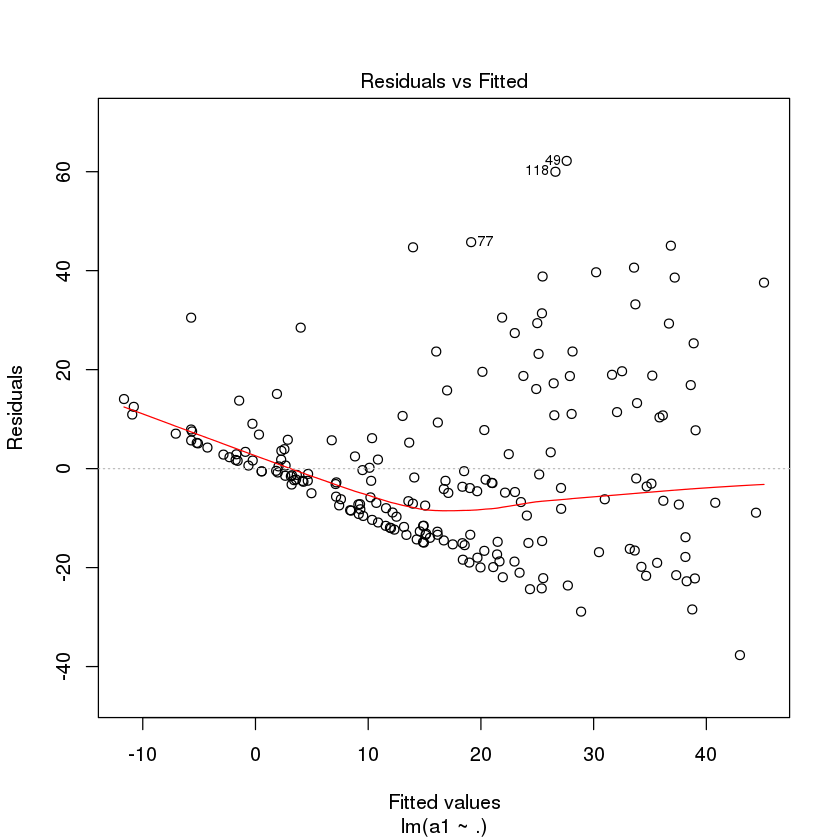

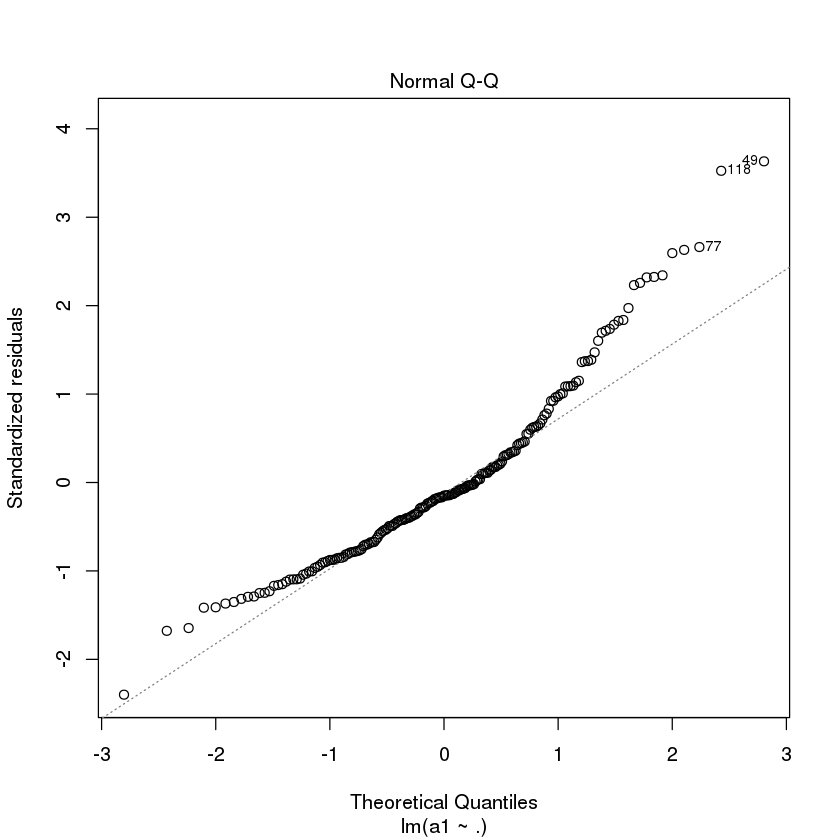

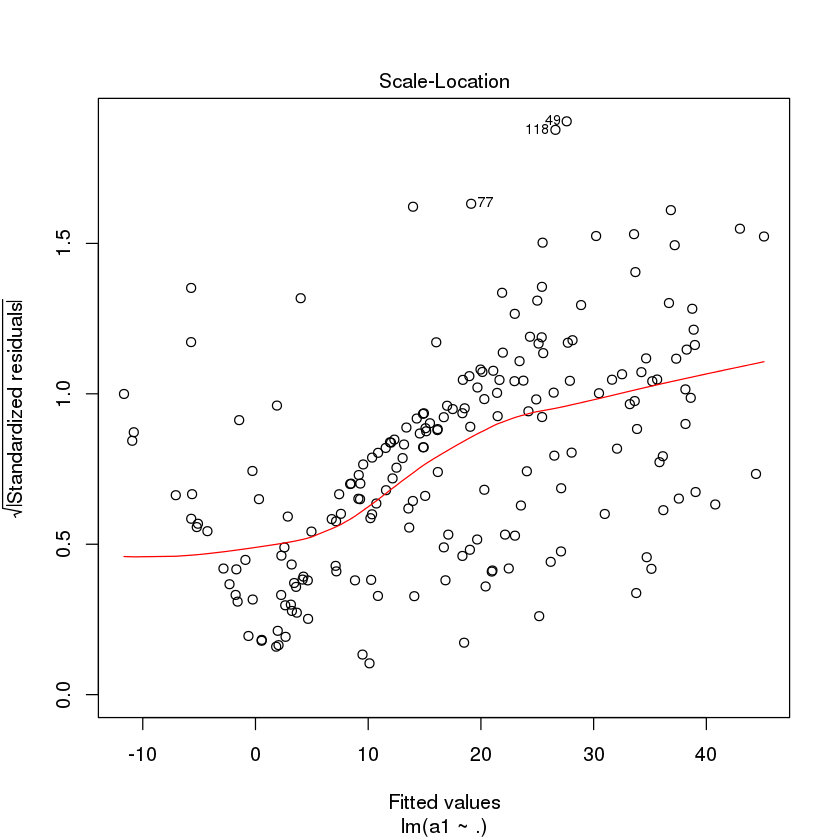

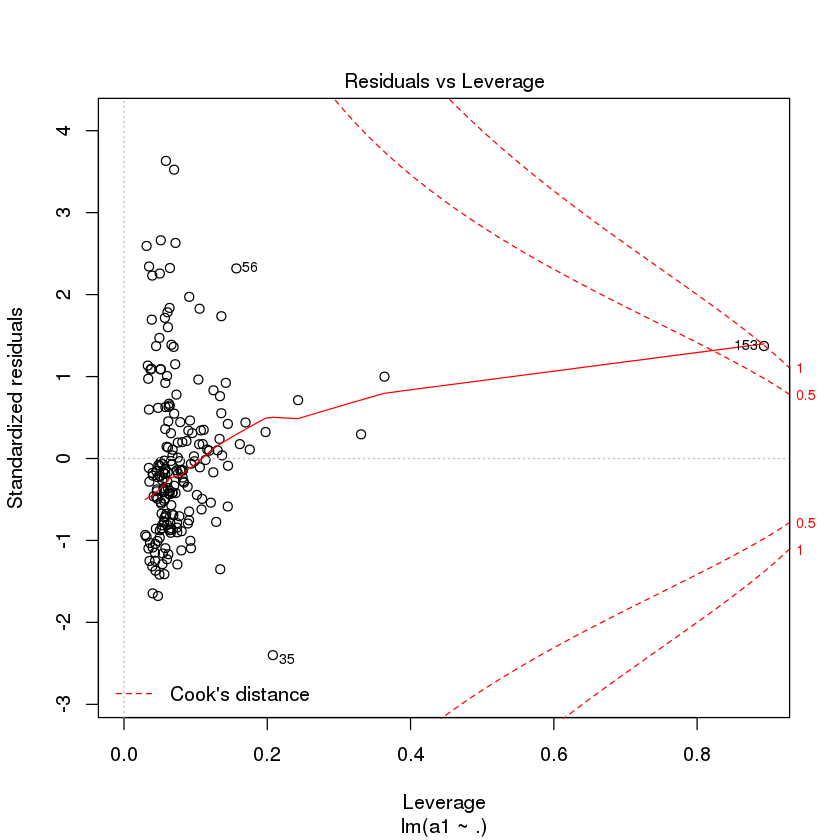

In [37]:
plot(lm.a1)

We can use the anova() function to isolate the effects of the individual factors:

In [38]:
anova(lm.a1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
season,3.00000000,84.54191817,28.18063939,0.09050673,0.96519437
size,2.000000e+00,1.140145e+04,5.700724e+03,1.830881e+01,5.690460e-08
speed,2.000000e+00,3.934377e+03,1.967188e+03,6.317948e+00,2.224381e-03
mxPH,1.000000e+00,1.328799e+03,1.328799e+03,4.267656e+00,4.026131e-02
mnO2,1.000000e+00,2.286789e+03,2.286789e+03,7.344398e+00,7.370459e-03
Cl,1.000000e+00,4.304281e+03,4.304281e+03,1.382390e+01,2.671492e-04
NO3,1.000000e+00,3.418460e+03,3.418460e+03,1.097895e+01,1.111813e-03
NH4,1.0000000,403.6258358,403.6258358,1.2963104,0.2563847
oPO4,1.000000e+00,4.787980e+03,4.787980e+03,1.537738e+01,1.245874e-04
PO4,1.000000e+00,1.405578e+03,1.405578e+03,4.514243e+00,3.496346e-02


Try to improve model fit by removing factors that are useless, e.g., season:

In [39]:
lm2.a1 <- update(lm.a1, . ~ . - season)
summary(lm2.a1)


Call:
lm(formula = a1 ~ size + speed + mxPH + mnO2 + Cl + NO3 + NH4 + 
    oPO4 + PO4 + Chla, data = clean.algae[, 1:12])

Residuals:
    Min      1Q  Median      3Q     Max 
-36.460 -11.953  -3.044   7.444  63.730 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) 44.9532874 23.2378377   1.934  0.05458 . 
sizemedium   3.3092102  3.7825221   0.875  0.38278   
sizesmall   10.2730961  4.1223163   2.492  0.01358 * 
speedlow     3.0546270  4.6108069   0.662  0.50848   
speedmedium -0.2976867  3.1818585  -0.094  0.92556   
mxPH        -3.2684281  2.6576592  -1.230  0.22033   
mnO2         0.8011759  0.6589644   1.216  0.22561   
Cl          -0.0381881  0.0333791  -1.144  0.25407   
NO3         -1.5334300  0.5476550  -2.800  0.00565 **
NH4          0.0015777  0.0009951   1.586  0.11456   
oPO4        -0.0062392  0.0395086  -0.158  0.87469   
PO4         -0.0509543  0.0305189  -1.670  0.09669 . 
Chla        -0.0841371  0.0794459  -1.059  0.29096   
---
Signif. 

Compare both models, again using anova():

In [40]:
anova(lm.a1,lm2.a1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1,182.00,56668.45,NA,NA,NA,NA
2,185.0000000,57116.0670107,-3.0000000,-447.6168306,0.4791982,0.6971488


### Stepwise (forward / backward) elimination

We can use step() to stepwise fit a model using AIC (Akaike information criterion):

2ln(L) + 2k

We see that season gets eliminated first, then speed, oPO4, Chla, mnO2, and NH4, leaving size + mxPH + Cl + NO3 + PO4.

In [41]:
final.lm <- step(lm.a1)

Start:  AIC=1152.03
a1 ~ season + size + speed + mxPH + mnO2 + Cl + NO3 + NH4 + oPO4 + 
    PO4 + Chla

         Df Sum of Sq   RSS    AIC
- season  3    447.62 57116 1147.6
- speed   2    269.60 56938 1149.0
- oPO4    1      5.78 56674 1150.0
- Chla    1    376.96 57045 1151.3
- Cl      1    443.46 57112 1151.6
- mxPH    1    548.76 57217 1151.9
<none>                56668 1152.0
- mnO2    1    694.11 57363 1152.4
- NH4     1    825.67 57494 1152.9
- PO4     1    898.42 57567 1153.1
- size    2   1857.16 58526 1154.4
- NO3     1   2339.36 59008 1158.0

Step:  AIC=1147.59
a1 ~ size + speed + mxPH + mnO2 + Cl + NO3 + NH4 + oPO4 + PO4 + 
    Chla

        Df Sum of Sq   RSS    AIC
- speed  2    210.64 57327 1144.3
- oPO4   1      7.70 57124 1145.6
- Chla   1    346.27 57462 1146.8
- Cl     1    404.10 57520 1147.0
- mnO2   1    456.37 57572 1147.2
- mxPH   1    466.95 57583 1147.2
<none>               57116 1147.6
- NH4    1    776.11 57892 1148.3
- PO4    1    860.62 57977 1148.5
- size

In [42]:
summary(final.lm)


Call:
lm(formula = a1 ~ size + mxPH + Cl + NO3 + PO4, data = clean.algae[, 
    1:12])

Residuals:
    Min      1Q  Median      3Q     Max 
-28.874 -12.732  -3.741   8.424  62.926 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 57.28555   20.96132   2.733  0.00687 ** 
sizemedium   2.80050    3.40190   0.823  0.41141    
sizesmall   10.40636    3.82243   2.722  0.00708 ** 
mxPH        -3.97076    2.48204  -1.600  0.11130    
Cl          -0.05227    0.03165  -1.651  0.10028    
NO3         -0.89529    0.35148  -2.547  0.01165 *  
PO4         -0.05911    0.01117  -5.291 3.32e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.5 on 191 degrees of freedom
Multiple R-squared:  0.3527,	Adjusted R-squared:  0.3324 
F-statistic: 17.35 on 6 and 191 DF,  p-value: 5.554e-16


Seeing how little R improved, it's time to turn to nonlinear models.

## Regression trees

In [43]:
library(rpart)
data(algae)
# no need to remove all NAs
algae <- algae[-manyNAs(algae), ]
rt.a1 <- rpart(a1 ~ .,data=algae[,1:12])
rt.a1

n= 198 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 198 90401.290 16.996460  
   2) PO4>=43.818 147 31279.120  8.979592  
     4) Cl>=7.8065 140 21622.830  7.492857  
       8) oPO4>=51.118 84  3441.149  3.846429 *
       9) oPO4< 51.118 56 15389.430 12.962500  
        18) mnO2>=10.05 24  1248.673  6.716667 *
        19) mnO2< 10.05 32 12502.320 17.646870  
          38) NO3>=3.1875 9   257.080  7.866667 *
          39) NO3< 3.1875 23 11047.500 21.473910  
            78) mnO2< 8 13  2919.549 13.807690 *
            79) mnO2>=8 10  6370.704 31.440000 *
     5) Cl< 7.8065 7  3157.769 38.714290 *
   3) PO4< 43.818 51 22442.760 40.103920  
     6) mxPH< 7.87 28 11452.770 33.450000  
      12) mxPH>=7.045 18  5146.169 26.394440 *
      13) mxPH< 7.045 10  3797.645 46.150000 *
     7) mxPH>=7.87 23  8241.110 48.204350  
      14) PO4>=15.177 12  3047.517 38.183330 *
      15) PO4< 15.177 11  2673.945 59.136360 *

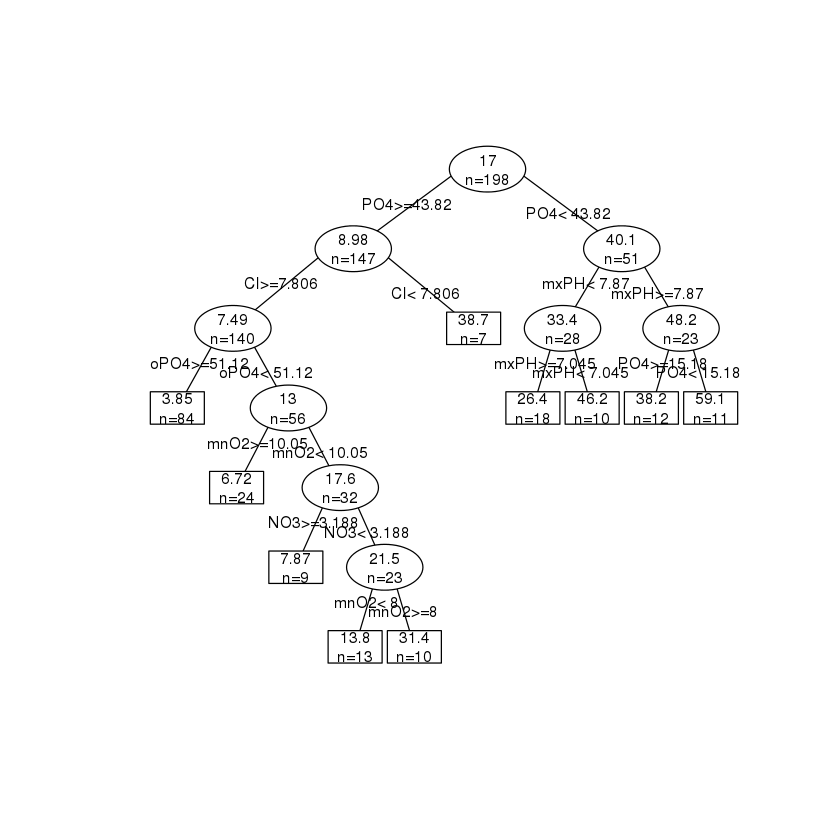

In [44]:
# from DMWR
prettyTree(rt.a1)

In [45]:
# complexity table
# rel. error is training error (as compared to root)
# xerror is test error (relative to root) estimated from 10 fold cross validation
printcp(rt.a1)


Regression tree:
rpart(formula = a1 ~ ., data = algae[, 1:12])

Variables actually used in tree construction:
[1] Cl   mnO2 mxPH NO3  oPO4 PO4 

Root node error: 90401/198 = 456.57

n= 198 

        CP nsplit rel error  xerror    xstd
1 0.405740      0   1.00000 1.00815 0.13069
2 0.071885      1   0.59426 0.70401 0.11242
3 0.030887      2   0.52237 0.62041 0.10898
4 0.030408      3   0.49149 0.61443 0.10766
5 0.027872      4   0.46108 0.61922 0.10729
6 0.027754      5   0.43321 0.61922 0.10729
7 0.018124      6   0.40545 0.61510 0.10602
8 0.016344      7   0.38733 0.63579 0.10873
9 0.010000      9   0.35464 0.65249 0.10504


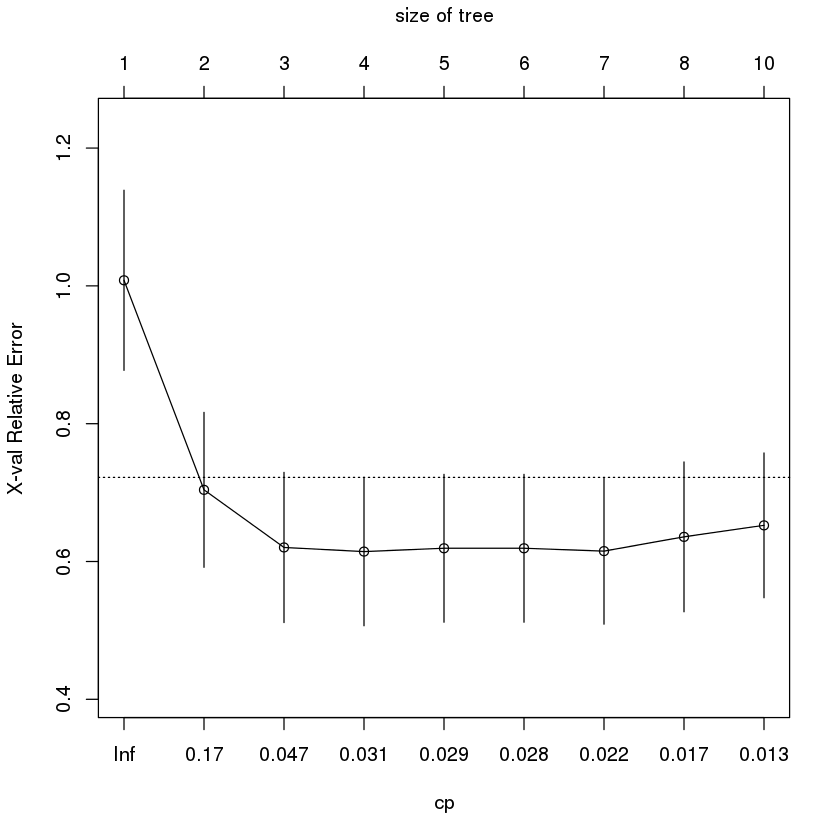

In [46]:
plotcp(rt.a1)

One way to prune this tree would be the 1-SE rule (from Breiman et al., Classification and Regression Trees).
The 1-SE rule selects the smallest tree with estimated error less than the B+x*SE, where B is the lowest estimate of error and SE is the standard error of this B estimate.

In [47]:
# smallest error is 0.67120
# corresponding SE is 0.11689
# 0.11689 + 0.67120 = 0.78809
(rt.a1.1se <- rpartXse(a1 ~ .,data=algae[,1:12]))

n= 198 

node), split, n, deviance, yval
      * denotes terminal node

1) root 198 90401.290 16.996460  
  2) PO4>=43.818 147 31279.120  8.979592  
    4) Cl>=7.1665 142 21763.160  7.530282 *
    5) Cl< 7.1665 5   746.792 50.140000 *
  3) PO4< 43.818 51 22442.760 40.103920 *

You can indicate the nodes where to prune the tree:

In [48]:
first.tree <- rpart(a1 ~ .,data=algae[,1:12])
first.tree

n= 198 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 198 90401.290 16.996460  
   2) PO4>=43.818 147 31279.120  8.979592  
     4) Cl>=7.8065 140 21622.830  7.492857  
       8) oPO4>=51.118 84  3441.149  3.846429 *
       9) oPO4< 51.118 56 15389.430 12.962500  
        18) mnO2>=10.05 24  1248.673  6.716667 *
        19) mnO2< 10.05 32 12502.320 17.646870  
          38) NO3>=3.1875 9   257.080  7.866667 *
          39) NO3< 3.1875 23 11047.500 21.473910  
            78) mnO2< 8 13  2919.549 13.807690 *
            79) mnO2>=8 10  6370.704 31.440000 *
     5) Cl< 7.8065 7  3157.769 38.714290 *
   3) PO4< 43.818 51 22442.760 40.103920  
     6) mxPH< 7.87 28 11452.770 33.450000  
      12) mxPH>=7.045 18  5146.169 26.394440 *
      13) mxPH< 7.045 10  3797.645 46.150000 *
     7) mxPH>=7.87 23  8241.110 48.204350  
      14) PO4>=15.177 12  3047.517 38.183330 *
      15) PO4< 15.177 11  2673.945 59.136360 *

In [49]:
snip.rpart(first.tree,c(4,7))

n= 198 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 198 90401.290 16.996460  
   2) PO4>=43.818 147 31279.120  8.979592  
     4) Cl>=7.8065 140 21622.830  7.492857 *
     5) Cl< 7.8065 7  3157.769 38.714290 *
   3) PO4< 43.818 51 22442.760 40.103920  
     6) mxPH< 7.87 28 11452.770 33.450000  
      12) mxPH>=7.045 18  5146.169 26.394440 *
      13) mxPH< 7.045 10  3797.645 46.150000 *
     7) mxPH>=7.87 23  8241.110 48.204350 *

Alternatively, this may be done interactively in rstudio:

In [50]:
#prettyTree(first.tree)
#snip.rpart(first.tree)

## Model Evaluation and Selection

#### Model evaluation: error measures

First obtain the predictions. This is still the training set, so we are evaluating training error for now.

In [51]:
lm.predictions.a1 <- predict(final.lm,clean.algae)
lm.predictions.a1[0:5]

1        2        3        4        5 
17.11470 -2.66132 17.60865 21.34476 17.70127

In [58]:
# original, unpruned tree
rt.predictions.a1 <- predict(rt.a1,algae)
rt.predictions.a1[0:5]

1        2        3        4        5 
3.846429 3.846429 3.846429 3.846429 3.846429

In [59]:
# pruned tree
rt.predictions.a1.1se <- predict(rt.a1.1se,algae)
rt.predictions.a1.1se[0:5]

1        2        3        4        5 
7.530282 7.530282 7.530282 7.530282 7.530282

#### Mean absolute error

In [60]:
(mae.a1.lm <- mean(abs(lm.predictions.a1-algae[,'a1'])))

[1] 13.10681

In [61]:
# unpruned tree
(mae.a1.rt <- mean(abs(rt.predictions.a1-algae[,'a1'])))

[1] 8.480619

In [62]:
# pruned tree
(mae.a1.1se.rt <- mean(abs(rt.predictions.a1.1se-algae[,'a1'])))

[1] 10.36242